In [ ]:
# ==============================================================================
# UNIVERSIDADE FEDERAL DA BAHIA - INSTITUTO DE COMPUTAÇÃO
# DISCIPLINA: IC0004 - ALGORITMOS E GRAFOS
# DOCENTE: GEORGE MARCONI DE ARAÚJO LIMA
# DISCENTE: GABRIEL FERNANDES ROCHA
# ==============================================================================

# Trabalho Prático: CAMINHO HAMILTONIANO

## Redução Polinomial

Imagem salva com sucesso como: reducao_hamiltoniano.png


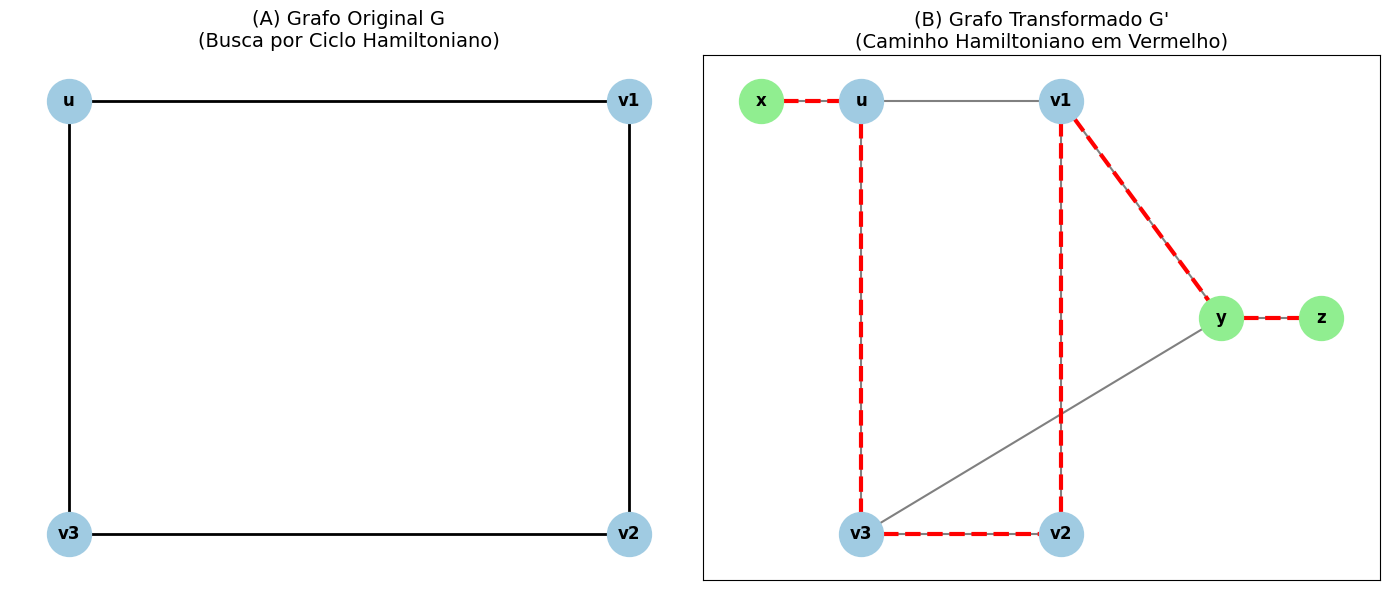

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def gerar_imagem_reducao():
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    G = nx.Graph()
    arestas_originais = [('u', 'v1'), ('v1', 'v2'), ('v2', 'v3'), ('v3', 'u')]
    G.add_edges_from(arestas_originais)

    pos_g = {
        'u':  (0, 1),
        'v1': (1, 1),
        'v2': (1, 0),
        'v3': (0, 0)
    }

    ax1 = axes[0]
    nx.draw(G, pos_g, ax=ax1, with_labels=True, node_size=1000,
            node_color='#A0CBE2', edge_color='black', width=2, font_weight='bold', font_size=12)
    ax1.set_title("(A) Grafo Original G\n(Busca por Ciclo Hamiltoniano)", fontsize=14)

    G_prime = G.copy()

    G_prime.add_node('x')
    G_prime.add_node('y')
    G_prime.add_node('z')
    G_prime.add_edge('x', 'u')
    G_prime.add_edge('y', 'z')
    G_prime.add_edge('y', 'v1')
    G_prime.add_edge('y', 'v3')

    pos_prime = {
        'x':  (-0.5, 1),
        'u':  (0, 1),
        'v1': (1, 1),
        'v2': (1, 0),
        'v3': (0, 0),
        'y':  (1.8, 0.5),
        'z':  (2.3, 0.5)
    }

    ax2 = axes[1]

    nx.draw_networkx_nodes(G_prime, pos_prime, ax=ax2, nodelist=['u','v1','v2','v3'],
                           node_size=1000, node_color='#A0CBE2', label='Originais')
    nx.draw_networkx_nodes(G_prime, pos_prime, ax=ax2, nodelist=['x','y','z'],
                           node_size=1000, node_color='#90EE90', label='Auxiliares')

    nx.draw_networkx_edges(G_prime, pos_prime, ax=ax2, width=1.5, edge_color='gray')

    caminho_solucao = [('x','u'), ('u','v3'), ('v3','v2'), ('v2','v1'), ('v1','y'), ('y','z')]

    nx.draw_networkx_edges(G_prime, pos_prime, ax=ax2, edgelist=caminho_solucao,
                           width=3, edge_color='red', style='dashed')

    nx.draw_networkx_labels(G_prime, pos_prime, ax=ax2, font_weight='bold', font_size=12)
    ax2.set_title("(B) Grafo Transformado G'\n(Caminho Hamiltoniano em Vermelho)", fontsize=14)

    plt.tight_layout()

    nome_arquivo = "reducao_hamiltoniano.png"
    plt.savefig(nome_arquivo, dpi=300, bbox_inches='tight')
    print(f"Imagem salva com sucesso como: {nome_arquivo}")
    plt.show()

if __name__ == "__main__":
    gerar_imagem_reducao()

## Parte C - Implementação

Para testar o código, basta substituir o caminho do txt abaixo

In [2]:
caminho_do_arquivo = "/content/drive/MyDrive/Colab Notebooks/Algoritmos e Grafos - Atividade 02/grafo_teste.txt"

In [6]:
import time

class HamiltonianoSolver:
    def __init__(self, filepath):
        self.n, self.m, self.adj = self._ler_arquivo(filepath)

    def _ler_arquivo(self, filepath):
        try:
            with open(filepath, 'r') as f:
                tokens = f.read().split()

            if not tokens:
                raise ValueError("O arquivo está vazio.")

            iterator = iter(tokens)

            try:
                n = int(next(iterator))
                m = int(next(iterator))
            except StopIteration:
                raise ValueError("O arquivo não possui o cabeçalho (n e m).")

            adj = [[] for _ in range(n)]

            arestas_lidas = 0
            for _ in range(m):
                try:
                    u = int(next(iterator))
                    v = int(next(iterator))

                    if u >= n or v >= n:
                        raise ValueError(f"Aresta refere-se a vértice {max(u,v)}, mas o grafo só tem {n} vértices (0 a {n-1}).")

                    adj[u].append(v)
                    adj[v].append(u)
                    arestas_lidas += 1
                except StopIteration:
                    raise ValueError(f"O cabeçalho diz que há {m} arestas, mas só foram encontradas {arestas_lidas} completas.")

            return n, m, adj

        except FileNotFoundError:
            raise FileNotFoundError(f"O arquivo não foi encontrado no caminho: {filepath}")
        except ValueError as ve:
            raise ve
        except Exception as e:
            raise Exception(f"Erro genérico na leitura: {e}")

    def resolver_backtracking(self):
        for start_node in range(self.n):
            visited = [False] * self.n
            visited[start_node] = True
            if self._backtrack_recursivo(start_node, 1, visited):
                return "SIM"
        return "NÃO"

    def _backtrack_recursivo(self, u, count, visited):
        if count == self.n:
            return True

        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True
                if self._backtrack_recursivo(v, count + 1, visited):
                    return True
                visited[v] = False
        return False

    def resolver_heuristica(self):
        for start_node in range(self.n):
            if self._nearest_neighbor(start_node):
                return "SIM"
        return "NÃO"

    def _nearest_neighbor(self, start_node):
        path_len = 1
        visited = {start_node}
        curr = start_node

        while path_len < self.n:
            candidatos = [v for v in self.adj[curr] if v not in visited]

            if not candidatos:
                return False

            prox = candidatos[0]
            visited.add(prox)
            curr = prox
            path_len += 1

        return True

def resolver_caminho_hamiltoniano(caminho_txt):
    print(f"\nLendo arquivo: {caminho_txt}")

    try:
        solver = HamiltonianoSolver(caminho_txt)
    except Exception as e:
        print(f"Erro: {e}")
        return

    print(f"Grafo carregado: {solver.n} Vértices | {solver.m} Arestas")
    print("-" * 50)
    print('\n')
    print("Executando algoritmo Exato")
    inicio = time.time()
    res_exato = solver.resolver_backtracking()
    tempo_exato = time.time() - inicio
    print(f"1. [EXATO - Backtracking] Resposta: {res_exato} | Tempo: {tempo_exato:.6f}s")

    print('\n')

    print("Executando Heurística")
    inicio = time.time()
    res_heur = solver.resolver_heuristica()
    tempo_heur = time.time() - inicio
    print(f"2. [HEURÍSTICA - Guloso]  Resposta: {res_heur} | Tempo: {tempo_heur:.6f}s")
    print('\n')
    print("-" * 50)

resolver_caminho_hamiltoniano(caminho_do_arquivo)


Lendo arquivo: /content/drive/MyDrive/Colab Notebooks/Algoritmos e Grafos - Atividade 02/grafo_teste.txt
Grafo carregado: 10 Vértices | 11 Arestas
--------------------------------------------------


Executando algoritmo Exato
1. [EXATO - Backtracking] Resposta: SIM | Tempo: 0.000048s


Executando Heurística
2. [HEURÍSTICA - Guloso]  Resposta: SIM | Tempo: 0.000026s


--------------------------------------------------


## Parte D - Experimentos

CONFIGURAÇÃO:

1. TAMANHOS: Lista com a quantidade de vértices (N) que serão testados.
2. LIMITE_N_EXATO: Trava de segurança para o algoritmo de Backtracking (O(n!)). Se N for maior que este número, o script PULA o algoritmo exato para evitar que o computador trave ou demore horas.
3. DENSIDADES: Probabilidade de haver uma aresta entre dois vértices (0.0 a 1.0).
4. REPETICOES: Quantos grafos aleatórios são gerados para cada teste. O script roda 3 vezes e tira a média para evitar casos de sorte/azar.

In [1]:
SEED = 2026
TAMANHOS = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
LIMITE_EXATO = 25
DENSIDADES = {'Esparso (20%)': 0.2, 'Denso (80%)': 0.8}
REPS = 10
TIMEOUT = 1200


ESPECIFICAÇÕES DO AMBIENTE DE TESTE
  SO: Linux
  Processador: x86_64
  RAM (GB): 12.67
  CPU Cores: 1
  Python: 3.12.12

CONFIGURAÇÃO DO EXPERIMENTO
  Tamanhos (n): [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
  Densidades: ['Esparso (20%)', 'Denso (80%)']
  Repetições por configuração: 10
  Limite algoritmo exato: N ≤ 25
  Timeout algoritmo exato: 1200s
  Seed: 2026

INICIANDO EXPERIMENTOS (N=5 até 50)

N= 5 | Esparso (20%)   | Exato: 0.000012s            | Heur: 0.000008s
N= 5 | Denso (80%)     | Exato: 0.000004s            | Heur: 0.000004s
N=10 | Esparso (20%)   | Exato: 0.000045s            | Heur: 0.000018s
N=10 | Denso (80%)     | Exato: 0.000015s            | Heur: 0.000011s
N=15 | Esparso (20%)   | Exato: 0.001440s            | Heur: 0.000053s
N=15 | Denso (80%)     | Exato: 0.000016s            | Heur: 0.000063s
N=20 | Esparso (20%)   | Exato: 0.923220s            | Heur: 0.000185s
N=20 | Denso (80%)     | Exato: 0.000014s            | Heur: 0.000102s
N=25 | Esparso (20%)   | Ex

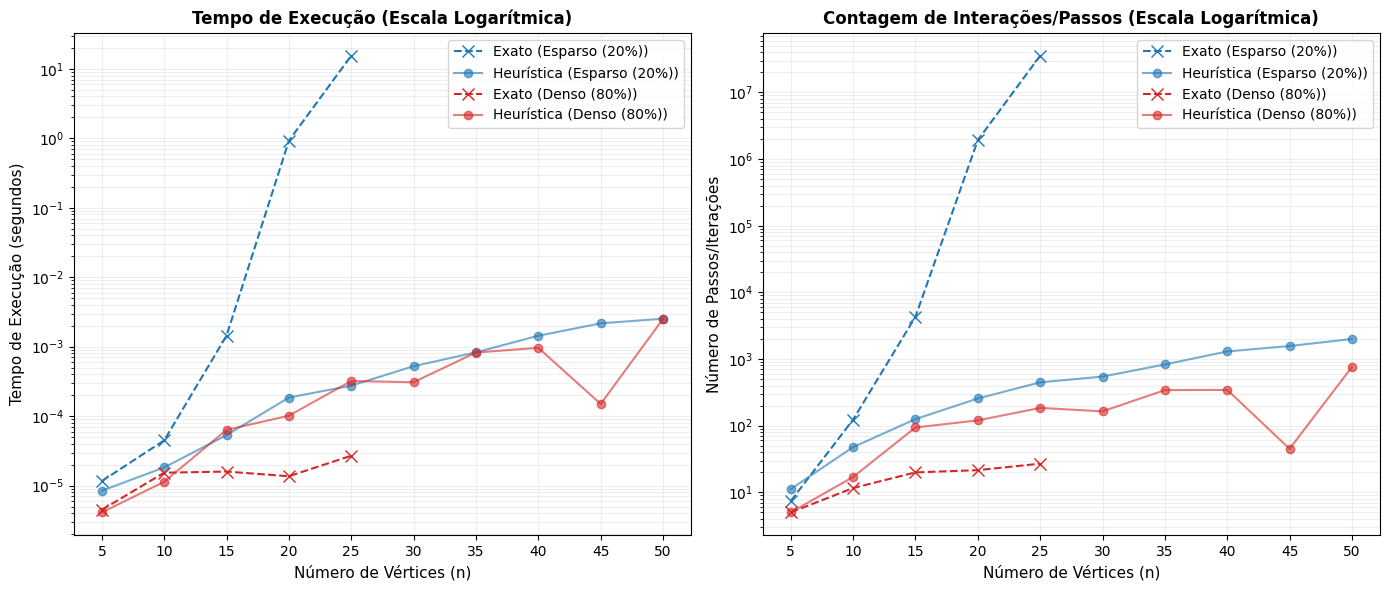

In [ ]:
import time
import random
import os
import platform
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
random.seed(SEED)
np.random.seed(SEED)

class HamiltonianoSolver:
    def __init__(self, filepath):
        self.n, self.m, self.adj = self._ler_arquivo(filepath)
        self.passos = 0
        self.tempo_inicio = None

    def _ler_arquivo(self, filepath):
        try:
            with open(filepath, 'r') as f:
                tokens = f.read().split()
            if not tokens:
                raise ValueError("Arquivo vazio.")
            iterator = iter(tokens)
            n = int(next(iterator))
            m = int(next(iterator))
            adj = [[] for _ in range(n)]
            for _ in range(m):
                try:
                    u = int(next(iterator))
                    v = int(next(iterator))
                    adj[u].append(v)
                    adj[v].append(u)
                except StopIteration:
                    break
            return n, m, adj
        except Exception:
            return 0, 0, []

    def resolver_backtracking(self):
        self.passos = 0
        self.tempo_inicio = time.time()

        for start in range(self.n):
            if time.time() - self.tempo_inicio > TIMEOUT:
                return "TIMEOUT", self.passos

            visited = [False] * self.n
            visited[start] = True
            if self._backtrack(start, 1, visited):
                return "SIM", self.passos

        return "NÃO", self.passos

    def _backtrack(self, u, count, visited):
        self.passos += 1

        if self.passos % 10000 == 0:
            if time.time() - self.tempo_inicio > TIMEOUT:
                return False

        if count == self.n:
            return True

        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True
                if self._backtrack(v, count + 1, visited):
                    return True
                visited[v] = False
        return False

    def resolver_heuristica(self):
        self.passos = 0
        for start in range(self.n):
            if self._nearest_neighbor(start):
                return "SIM", self.passos
        return "NÃO", self.passos

    def _nearest_neighbor(self, start):
        path_len = 1
        visited = {start}
        curr = start
        self.passos += 1

        while path_len < self.n:
            candidatos = [v for v in self.adj[curr] if v not in visited]
            self.passos += 1
            if not candidatos:
                return False

            prox = candidatos[0]
            visited.add(prox)
            curr = prox
            path_len += 1
        return True


def get_hardware_info():
    try:
        import psutil
        mem = psutil.virtual_memory()
        ram = round(mem.total / (1024**3), 2)
        cores = psutil.cpu_count(logical=False)
    except ImportError:
        ram = "N/A"
        cores = "N/A"

    return {
        'SO': platform.system(),
        'Processador': platform.processor(),
        'RAM (GB)': ram,
        'CPU Cores': cores,
        'Python': sys.version.split()[0]
    }


def gerar_grafo(n, densidade, path, seed=None):
    if seed is not None:
        random.seed(seed)

    arestas = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < densidade:
                arestas.append((i, j))

    with open(path, 'w') as f:
        f.write(f"{n} {len(arestas)}\n")
        for u, v in arestas:
            f.write(f"{u} {v}\n")


def rodar_experimentos():
    hw = get_hardware_info()
    print("\n" + "="*100)
    print("ESPECIFICAÇÕES DO AMBIENTE DE TESTE")
    print("="*100)
    for k, v in hw.items():
        print(f"  {k}: {v}")

    print("\n" + "="*100)
    print("CONFIGURAÇÃO DO EXPERIMENTO")
    print("="*100)
    print(f"  Tamanhos (n): {TAMANHOS}")
    print(f"  Densidades: {list(DENSIDADES.keys())}")
    print(f"  Repetições por configuração: {REPS}")
    print(f"  Limite algoritmo exato: N ≤ {LIMITE_EXATO}")
    print(f"  Timeout algoritmo exato: {TIMEOUT}s")
    print(f"  Seed: {SEED}")

    print("\n" + "="*100)
    print(f"INICIANDO EXPERIMENTOS (N={min(TAMANHOS)} até {max(TAMANHOS)})")
    print("="*100 + "\n")

    resultados = []

    for n in TAMANHOS:
        for nome_dens, prob in DENSIDADES.items():
            tempos_ex, passos_ex, sucesso_ex = [], [], []
            tempos_h, passos_h, sucesso_h = [], [], []

            for rep in range(REPS):
                seed_inst = SEED + (n * 1000) + (int(prob * 100)) + rep
                arquivo = f"temp_{n}_{int(prob*100)}_{rep}.txt"
                gerar_grafo(n, prob, arquivo, seed=seed_inst)

                try:
                    solver = HamiltonianoSolver(arquivo)

                    if n <= LIMITE_EXATO:
                        inicio = time.perf_counter()
                        res, passos = solver.resolver_backtracking()
                        tempo = time.perf_counter() - inicio

                        if res != "TIMEOUT":
                            tempos_ex.append(tempo)
                            passos_ex.append(passos)
                            sucesso_ex.append(1 if res == "SIM" else 0)
                        else:
                            print(f"    [AVISO] N={n}, Rep={rep}: Timeout")

                    inicio = time.perf_counter()
                    res_h, passos_h_val = solver.resolver_heuristica()
                    tempo_h = time.perf_counter() - inicio

                    tempos_h.append(tempo_h)
                    passos_h.append(passos_h_val)
                    sucesso_h.append(1 if res_h == "SIM" else 0)

                finally:
                    if os.path.exists(arquivo):
                        os.remove(arquivo)

            if n <= LIMITE_EXATO and tempos_ex:
                media_t_ex = np.mean(tempos_ex)
                media_p_ex = np.mean(passos_ex)
                taxa_ex = np.mean(sucesso_ex) * 100
            else:
                media_t_ex = media_p_ex = taxa_ex = np.nan

            media_t_h = np.mean(tempos_h)
            media_p_h = np.mean(passos_h)
            taxa_h = np.mean(sucesso_h) * 100

            resultados.append({
                'N': n,
                'Densidade': nome_dens,
                'Tempo Exato (s)': media_t_ex,
                'Passos Exato': media_p_ex,
                'Soluções Existentes (%)': taxa_ex,
                'Tempo Heurística (s)': media_t_h,
                'Passos Heurística': media_p_h,
                'Soluções Encontradas (%)': taxa_h,
            })

            status_ex = f"{media_t_ex:.6f}s" if not np.isnan(media_t_ex) else "N/A"
            status_h = f"{media_t_h:.6f}s"
            print(f"N={n:2d} | {nome_dens:15s} | Exato: {status_ex:20s} | Heur: {status_h}")

    print("\n" + "="*100)
    print("EXPERIMENTOS CONCLUÍDOS")
    print("="*100)

    return pd.DataFrame(resultados)


def plotar_graficos(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    cores = {'Esparso (20%)': '#1f77b4', 'Denso (80%)': '#d62728'}
    ticks = df['N'].unique()

    for dens in DENSIDADES.keys():
        data = df[df['Densidade'] == dens]
        valid = data.dropna(subset=['Tempo Exato (s)'])

        if not valid.empty:
            ax1.plot(valid['N'], valid['Tempo Exato (s)'], 'x--',
                     label=f'Exato ({dens})', color=cores[dens], markersize=8, linewidth=1.5)

        ax1.plot(data['N'], data['Tempo Heurística (s)'], 'o-',
                 label=f'Heurística ({dens})', color=cores[dens], alpha=0.6, markersize=6, linewidth=1.5)

    ax1.set_yscale('log')
    ax1.set_title('Tempo de Execução (Escala Logarítmica)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Tempo de Execução (segundos)', fontsize=11)
    ax1.set_xlabel('Número de Vértices (n)', fontsize=11)
    ax1.set_xticks(ticks)
    ax1.grid(True, which="both", ls="-", alpha=0.2)
    ax1.legend()

    for dens in DENSIDADES.keys():
        data = df[df['Densidade'] == dens]
        valid = data.dropna(subset=['Passos Exato'])

        if not valid.empty:
            ax2.plot(valid['N'], valid['Passos Exato'], 'x--',
                     color=cores[dens], label=f'Exato ({dens})', markersize=8, linewidth=1.5)

        ax2.plot(data['N'], data['Passos Heurística'], 'o-',
                 color=cores[dens], alpha=0.6, label=f'Heurística ({dens})', markersize=6, linewidth=1.5)

    ax2.set_yscale('log')
    ax2.set_title('Contagem de Interações/Passos (Escala Logarítmica)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Número de Passos/Iterações', fontsize=11)
    ax2.set_xlabel('Número de Vértices (n)', fontsize=11)
    ax2.set_xticks(ticks)
    ax2.grid(True, which="both", ls="-", alpha=0.2)
    ax2.legend()

    plt.tight_layout()
    plt.savefig('graficos_resultados.png', dpi=300, bbox_inches='tight')
    print("\nGráficos salvos: graficos_resultados.png (300 DPI)")
    plt.show()


def exportar_dados(df):
    df.to_csv('resultados_completos.csv', index=False, float_format='%.10f')
    print("CSV: resultados_completos.csv")

    tabela = df.copy()
    for col in ['Tempo Exato (s)', 'Tempo Heurística (s)']:
        tabela[col] = tabela[col].apply(lambda x: f"{x:.6f}" if not np.isnan(x) else "-")
    for col in ['Passos Exato', 'Passos Heurística']:
        tabela[col] = tabela[col].apply(lambda x: f"{int(x):,}" if not np.isnan(x) else "-")

    for col in ['Soluções Existentes (%)', 'Soluções Encontradas (%)']:
        tabela[col] = tabela[col].apply(lambda x: f"{x:.1f}" if not np.isnan(x) else "-")

    try:
        with pd.ExcelWriter('resultados_completos.xlsx', engine='openpyxl') as writer:
            df.to_excel(writer, sheet_name='Dados_Completos', index=False)
            tabela.to_excel(writer, sheet_name='Tabela_Relatorio', index=False)
        print("Excel: resultados_completos.xlsx")
    except ImportError:
        print("[AVISO] openpyxl não instalado. Excel não gerado.")
    print("="*100)


if __name__ == "__main__":
    df = rodar_experimentos()

    print("\nTABELA DE RESULTADOS")
    print("="*100)
    pd.options.display.float_format = '{:.6f}'.format
    pd.options.display.max_columns = None
    pd.options.display.width = None
    print(df.to_string(index=False))

    print("\n" + "="*100)
    print("EXPORTANDO RESULTADOS")
    print("="*100)
    exportar_dados(df)

    plotar_graficos(df)